In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from csmc.errors.errors import approx_err

from csmc import CSMC, NuclearNormMin
from csmc.css import uniform
from csmc.transform import dls
from tests.data_generation import remove_pixels_uniformly

Image inpaiting with Nuclear Norm Minimization. 

M with dimensions (500, 1000)


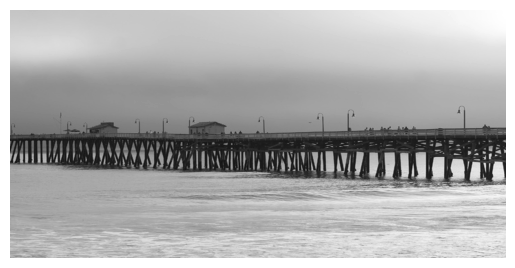

In [2]:
M = imread('PICS/bridge.png')
print(f"M with dimensions {M.shape}")
plt.imshow(M, cmap='gray')
plt.axis('off')
plt.show()

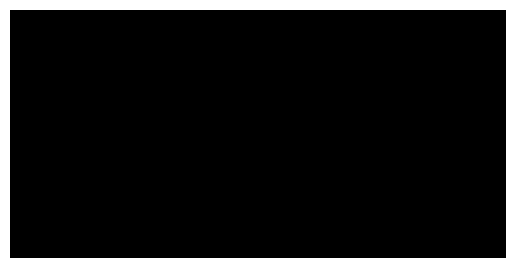

In [3]:
M_incomplete = remove_pixels_uniformly(M, missing_part=0.8)
missing_mask = np.isnan(M_incomplete)

current_cmap = matplotlib.colormaps["gray"]
current_cmap.set_bad(color="black")
plt.axis("off")
plt.imshow(M_incomplete, cmap=current_cmap)

In [4]:
%%time
n_selected_cols = int(0.5 * M.shape[1])
solver = CSMC(M_incomplete, col_number=n_selected_cols, transform=dls, col_select=uniform, fill_method="zero")
M_filled = solver.fit_transform(M_incomplete)

CPU times: user 7min 1s, sys: 31.6 s, total: 7min 33s
Wall time: 6min 42s


Relative approximation error 0.0991765853638307


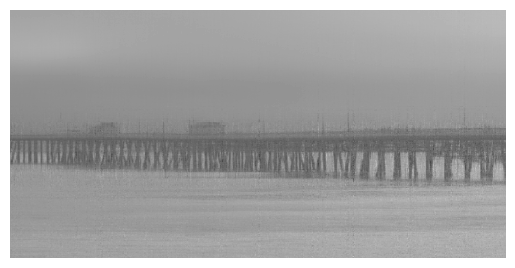

In [5]:
print(f"Relative approximation error {approx_err(M_filled, M)}")
plt.axis("off")
plt.imshow(M_filled, cmap="gray")
plt.show()

In [6]:
%%time
solver = NuclearNormMin(M_incomplete)
M_filled = solver.fit_transform(M_incomplete, np.isnan(M_incomplete))

CPU times: user 24min 36s, sys: 1.51 s, total: 24min 37s
Wall time: 24min 37s


In [ ]:
print(f"Relative approximation error {approx_err(M_filled, M)}")
plt.axis("off")
plt.imshow(M_filled, cmap="gray")
plt.show()